# COVID Datahub - Exploratory Data Analysis

## Libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing data

Using data from the COVID19 Datahub, administrative level 1 in `.csv` format available at https://storage.covid19datahub.io/data-1.csv

In [7]:
data1 = pd.read_csv("./data/data-1.csv")
print(data1.shape)
print(data1.columns)
data1.head()

(57721, 35)
Index(['id', 'date', 'tests', 'confirmed', 'recovered', 'deaths', 'hosp',
       'vent', 'icu', 'population', 'school_closing', 'workplace_closing',
       'cancel_events', 'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_apple_mobility', 'key_google_mobility'],
      dtype='object')


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
0,AFG,2020-01-01,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
1,AFG,2020-01-02,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
2,AFG,2020-01-03,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
3,AFG,2020-01-04,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
4,AFG,2020-01-05,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF


Go to https://covid19datahub.io/articles/doc/data.html to get a description of what each variable in the dataset represents

In [15]:
# Converting dates to datetime format
data1['date'] = pd.to_datetime(data1['date'], format='%Y-%m-%d')

## Example exploratory code

### Visualizing data for a specific country

Using Canada as an example

In [39]:
selected_country = "Canada"
data_country = data1[data1.administrative_area_level_1 == selected_country]
print(data_country.shape)
data_country.head()

(293, 35)


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
9376,CAN,2020-01-01,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9377,CAN,2020-01-02,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9378,CAN,2020-01-03,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9379,CAN,2020-01-04,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9380,CAN,2020-01-05,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA


Checking initial and final date of observations for a country

In [40]:
print(data_country.date.max() - data_country.date.min())
print(data_country.date.min())
print(data_country.date.max())

292 days 00:00:00
2020-01-01 00:00:00
2020-10-19 00:00:00


Visualizing how `workplace_closing` policy has changed thoughout the pandemic, where:
- 0: No measures 
- 1: Recommend closing (or work from home) 
- 2: require closing for some sectors or categories of workers 
- 3: require closing (or work from home) all-but-essential workplaces (eg grocery stores, doctors).

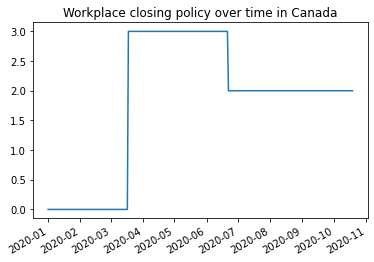

In [44]:
fig, ax = plt.subplots()
ax.plot(data_country['date'], data_country['workplace_closing'])
ax.set_title('Workplace closing policy over time in ' + selected_country)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

Visualizing the number of confirmed cases and deaths over time

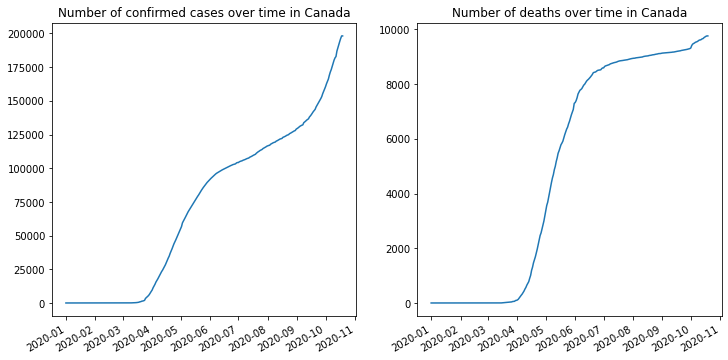

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(data_country['date'], data_country['confirmed'])
ax1.set_title('Number of confirmed cases over time in ' + selected_country)
ax2.plot(data_country['date'], data_country['deaths'])
ax2.set_title('Number of deaths over time in ' + selected_country)
fig.autofmt_xdate()

Visualizing school closing policy in the selected country

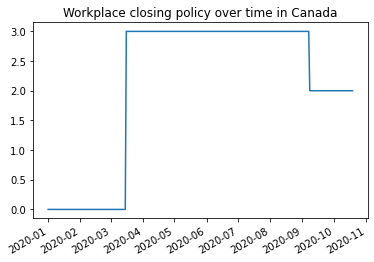

In [69]:
fig, ax = plt.subplots()
ax.plot(data_country['date'], data_country['school_closing'])
ax.set_title('Workplace closing policy over time in ' + selected_country)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

Visualizing the effects of school closing policies on the number of confirmed cases

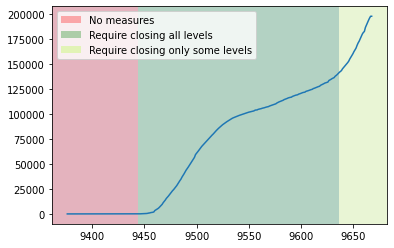

In [100]:
from matplotlib.patches import Patch
ax = data_country['confirmed'].plot()
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              data_country['school_closing'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.3)

legend_elements = [Patch(facecolor='red', edgecolor=None, alpha=0.3, label='No measures'),
                  Patch(facecolor='green', edgecolor=None, alpha=0.3, label='Require closing all levels'),
                  Patch(facecolor='greenyellow', edgecolor=None, alpha=0.3, label='Require closing only some levels')]

# Create the figure
#fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left');

### Comparing two countries

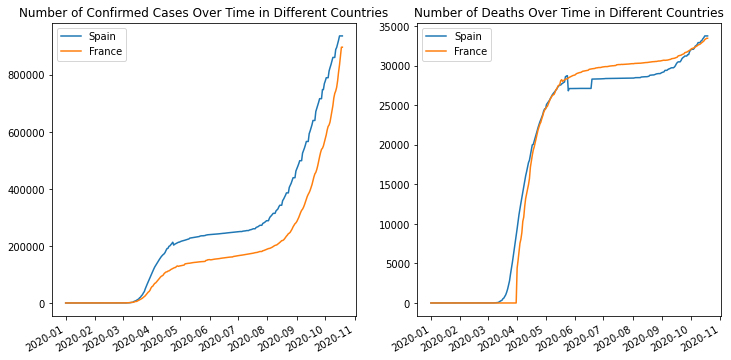

In [67]:
selected_countries = ["Spain", "France"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for country in selected_countries:
    data_country_it = data1[data1.administrative_area_level_1 == country]
    ax1.plot(data_country_it['date'], data_country_it['confirmed'], label=country)
    ax1.set_title('Number of Confirmed Cases Over Time in Different Countries')
    ax2.plot(data_country_it['date'], data_country_it['deaths'], label=country)
    ax2.set_title('Number of Deaths Over Time in Different Countries')
fig.autofmt_xdate()
ax1.legend()
ax2.legend()